In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("retail_sales_dataset.csv")
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,5/16/2023,CUST996,Male,62,Clothing,1,50,50
996,997,11/17/2023,CUST997,Male,52,Beauty,3,30,90
997,998,10/29/2023,CUST998,Female,23,Beauty,4,25,100
998,999,12/5/2023,CUST999,Female,36,Electronics,3,50,150


In [5]:
df.columns= df.columns.str.strip().str.lower().str.replace(' ', '_')

In [6]:
df.columns
df.describe()

,transaction_id,age,quantity,price_per_unit,total_amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [8]:
df.drop(['transaction_id', 'customer_id'], axis=1, inplace= True)

KeyError: "['transaction_id', 'customer_id'] not found in axis"

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              1000 non-null   object
 1   gender            1000 non-null   object
 2   age               1000 non-null   int64 
 3   product_category  1000 non-null   object
 4   quantity          1000 non-null   int64 
 5   price_per_unit    1000 non-null   int64 
 6   total_amount      1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [10]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')
df.head()

,date,gender,age,product_category,quantity,price_per_unit,total_amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


In [13]:
df['date']= pd.to_datetime(df['date'], format= '%m-%d-%Y')

In [14]:
df['year']= df['date'].dt.year

In [15]:
df['month']= df['date'].dt.month

In [16]:
df['day_of_week']= df['date'].dt.dayofweek

In [17]:
df['day']= df['date'].dt.day

In [18]:
df['dd-mm'] = df['date'].dt.strftime('%Y-%m')

In [19]:
df

,date,gender,age,product_category,quantity,price_per_unit,total_amount,year,month,day_of_week,day,dd-mm
0,2023-11-24,Male,34,Beauty,3,50,150,2023,11,4,24,2023-11
1,2023-02-27,Female,26,Clothing,2,500,1000,2023,2,0,27,2023-02
2,2023-01-13,Male,50,Electronics,1,30,30,2023,1,4,13,2023-01
3,2023-05-21,Male,37,Clothing,1,500,500,2023,5,6,21,2023-05
4,2023-05-06,Male,30,Beauty,2,50,100,2023,5,5,6,2023-05
...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-05-16,Male,62,Clothing,1,50,50,2023,5,1,16,2023-05
996,2023-11-17,Male,52,Beauty,3,30,90,2023,11,4,17,2023-11
997,2023-10-29,Female,23,Beauty,4,25,100,2023,10,6,29,2023-10
998,2023-12-05,Female,36,Electronics,3,50,150,2023,12,1,5,2023-12


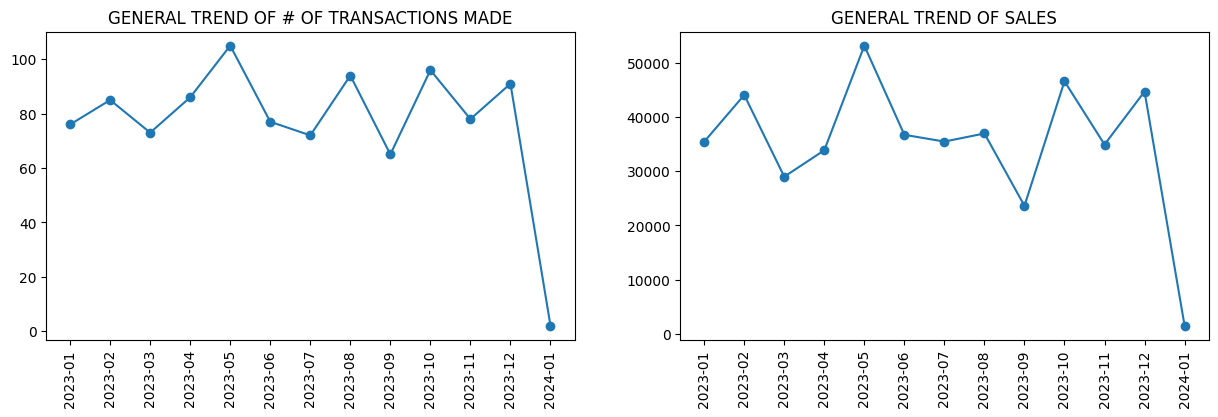

In [20]:
fig, axes = plt.subplots(nrows= 1, ncols=2, figsize= (15, 4))

by_dd_mm = df['dd-mm'].value_counts().reset_index().sort_values('dd-mm', ascending=True)
by_dd_mm_sales = df.groupby('dd-mm')['total_amount'].sum().reset_index().sort_values('dd-mm', ascending= True)


axes[0].plot(by_dd_mm['dd-mm'], by_dd_mm['count'], marker='o')
axes[0].set_title('GENERAL TREND OF # OF TRANSACTIONS MADE')
axes[0].tick_params(axis='x', rotation=90) 

axes[1].plot(by_dd_mm_sales['dd-mm'], by_dd_mm_sales['total_amount'], marker='o')
axes[1].set_title('GENERAL TREND OF SALES')
axes[1].tick_params(axis='x', rotation=90) 

plt.show()

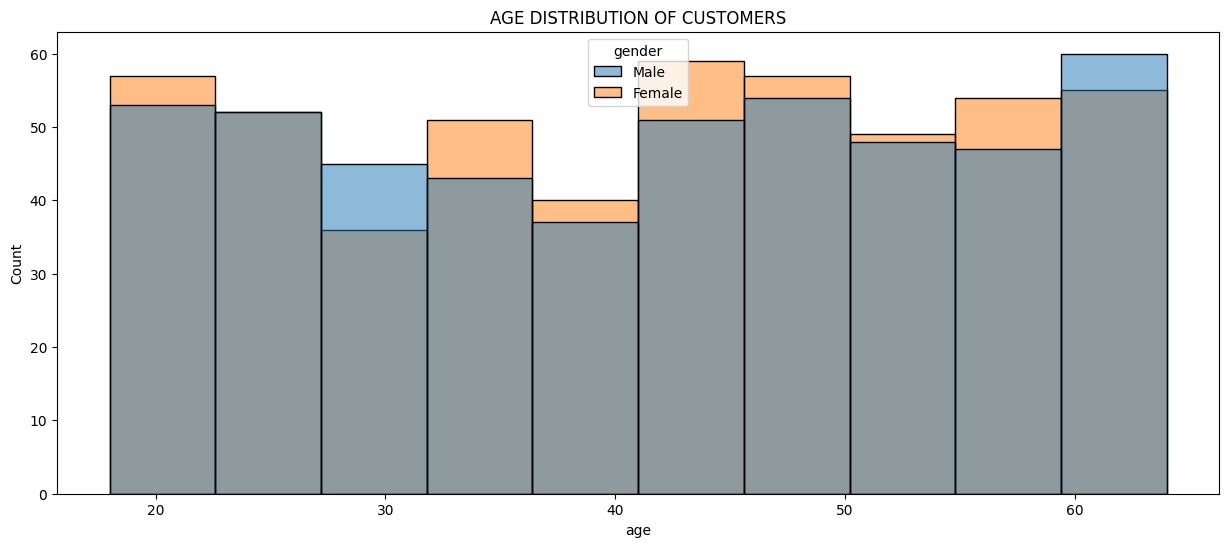

In [21]:
plt.figure(figsize=(15,6))
sns.histplot(data= df, x='age', hue='gender', bins=10)
plt.title('AGE DISTRIBUTION OF CUSTOMERS')
plt.show()

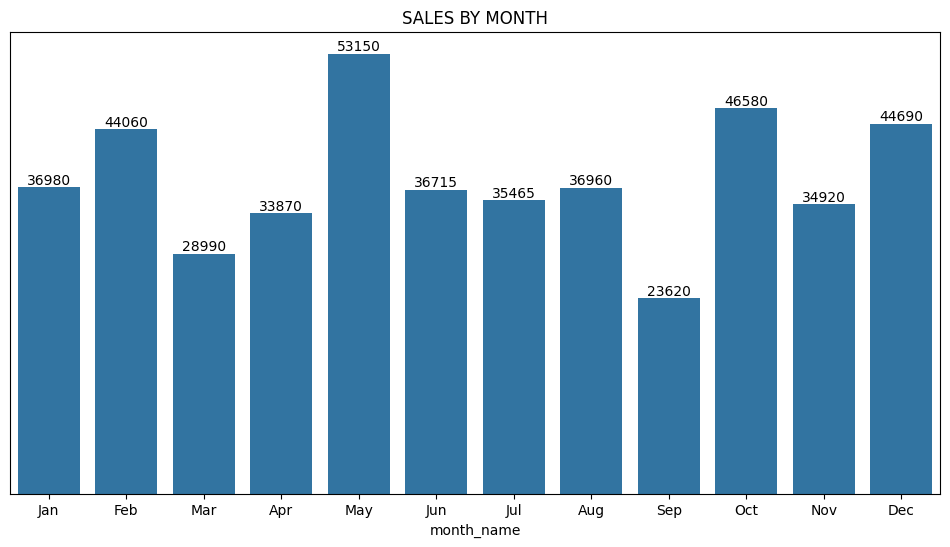

In [22]:
sales_by_month= df.groupby('month')['total_amount'].sum().reset_index().sort_values('month')
sales_by_month['month_name']= sales_by_month['month'].map({
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
})
plt.figure(figsize=(12, 6))
a= sns.barplot(data= sales_by_month, x='month_name', y='total_amount')
for i in a.containers:
    a.bar_label(i)
plt.gca().get_yaxis().set_visible(False)
plt.title('SALES BY MONTH')
plt.show()

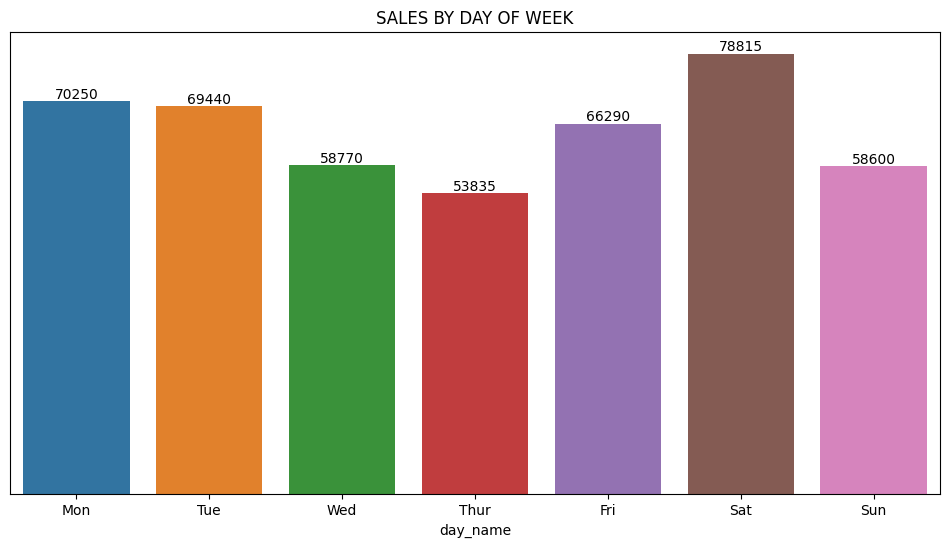

In [ ]:
sales_by_day= df.groupby('day_of_week')['total_amount'].sum().reset_index().sort_values('day_of_week')
sales_by_day['day_name']= sales_by_day['day_of_week'].map({
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thur',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun',
})
plt.figure(figsize=(12, 6))
a= sns.barplot(data= sales_by_day, x='day_name', y='total_amount')
for i in a.containers:
    a.bar_label(i)
plt.gca().get_yaxis().set_visible(False)
plt.title('SALES BY DAY OF WEEK')
plt.show()

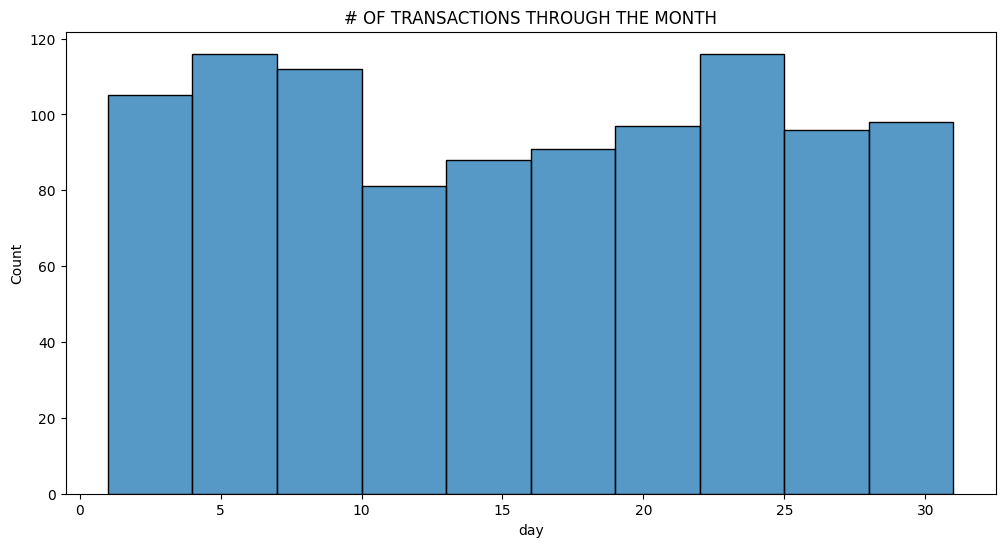

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(data= df,x='day', bins=10)
plt.title('# OF TRANSACTIONS THROUGH THE MONTH')
plt.show()

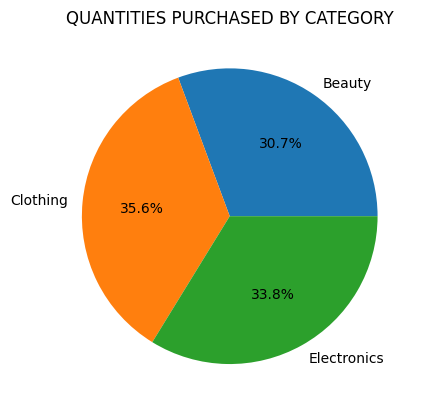

In [24]:
by_cat = df.groupby('product_category')['quantity'].sum().reset_index()
plt.pie(by_cat['quantity'], labels= by_cat['product_category'], autopct = '%1.1f%%')
plt.title('QUANTITIES PURCHASED BY CATEGORY')
plt.show()

In [ ]:
def sales_quant(col):
    gender_wise_sales = df[df['product_category']== col].groupby('gender')['total_amount'].sum().reset_index()
    gender_wise_quant = df[df['product_category']== col].groupby('gender')['quantity'].sum().reset_index()
    return gender_wise_sales, gender_wise_quant

In [ ]:
def pie_plts(x1, lab1, tit1, x2, lab2, tit2):
    fig, axes = plt.subplots(nrows= 1, ncols=2, figsize= (15, 4))


    axes[0].pie(x1, labels= lab1, autopct='%1.1f%%')
    axes[0].set_title(tit1)

    axes[1].pie(x2, labels= lab2, autopct='%1.1f%%')
    axes[1].set_title(tit2)

    plt.show()

In [ ]:
def trend(x, y, tit):
    plt.figure(figsize=(12,6))
    plt.plot(x, y, marker='o')
    plt.title(tit)
    plt.show()

In [ ]:
def col_df(col):
    return df[df['product_category']==col]

In [ ]:
def age_demo(df, tit):
    plt.figure(figsize= (12, 6))
    sns.histplot(data= df, x='age', hue='gender')
    plt.title(tit)
    plt.show()

**CLOTHING**

In [ ]:
clothing_df = col_df('Clothing')
c_sales, c_quant = sales_quant('Clothing')

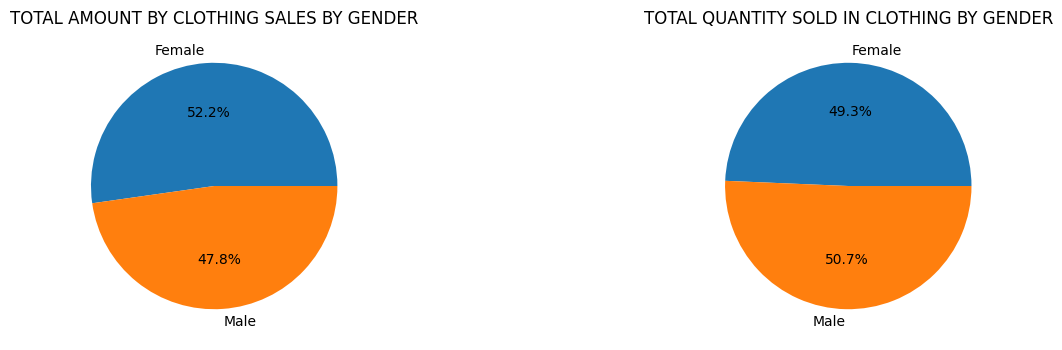

In [ ]:
pie_plts(c_sales['total_amount'], c_sales['gender'], 'TOTAL AMOUNT BY CLOTHING SALES BY GENDER',
        c_quant['quantity'], c_quant['gender'], 'TOTAL QUANTITY SOLD IN CLOTHING BY GENDER')

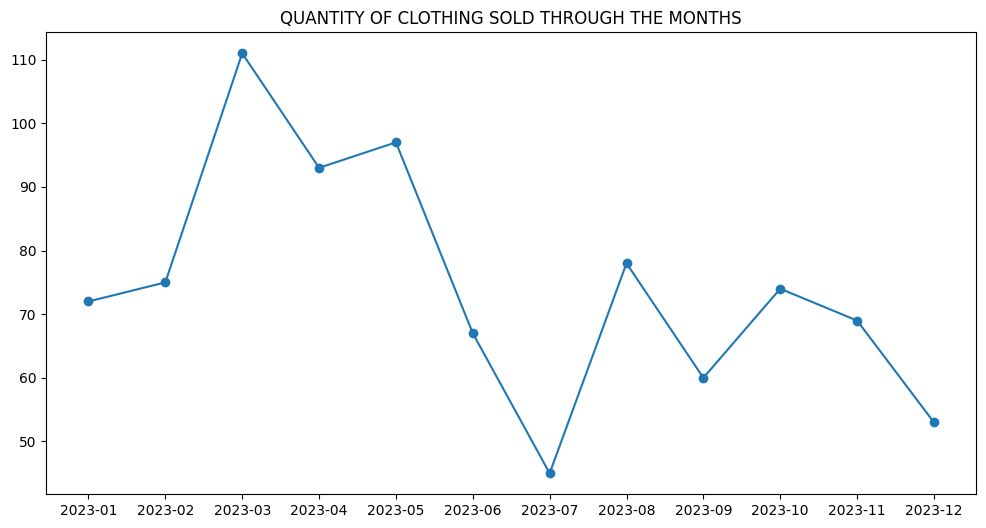

In [ ]:
c_dd_mm = clothing_df.groupby('dd-mm')['quantity'].sum().reset_index()
trend(c_dd_mm['dd-mm'], c_dd_mm['quantity'], 'QUANTITY OF CLOTHING SOLD THROUGH THE MONTHS')

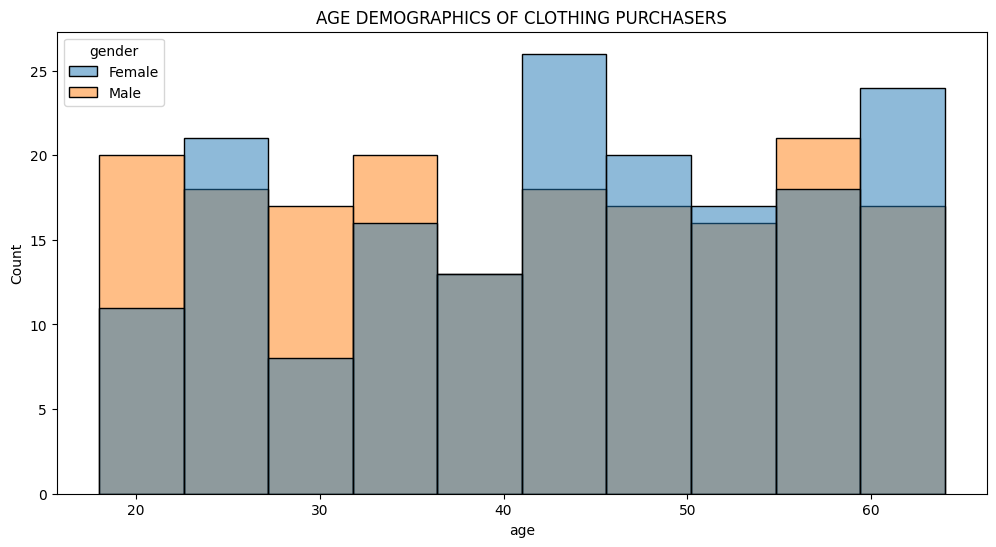

In [ ]:
age_demo(clothing_df, 'AGE DEMOGRAPHICS OF CLOTHING PURCHASERS')

* Women spend more while buying lesser quantity compared to men. May be likely due to Pink tax

* Sales peek during March and falls during September

* Men tend to be on the older spectrum compared to women though theres a significant amount of women in their late 50s

**ELECTRONICS**

In [ ]:
e_df = col_df('Electronics')
e_sales, e_quant = sales_quant('Electronics')
e_dd_mm = e_df.groupby('dd-mm')['quantity'].sum().reset_index()

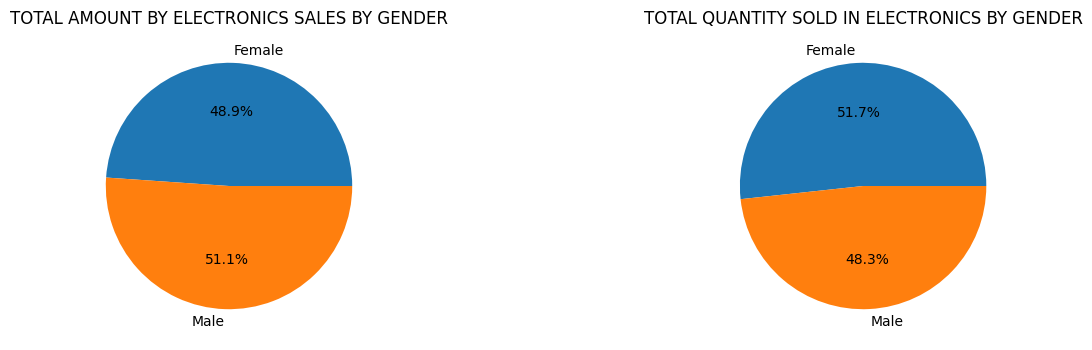

In [ ]:
pie_plts(e_sales['total_amount'], e_sales['gender'], 'TOTAL AMOUNT BY ELECTRONICS SALES BY GENDER',
        e_quant['quantity'], e_quant['gender'], 'TOTAL QUANTITY SOLD IN ELECTRONICS BY GENDER')

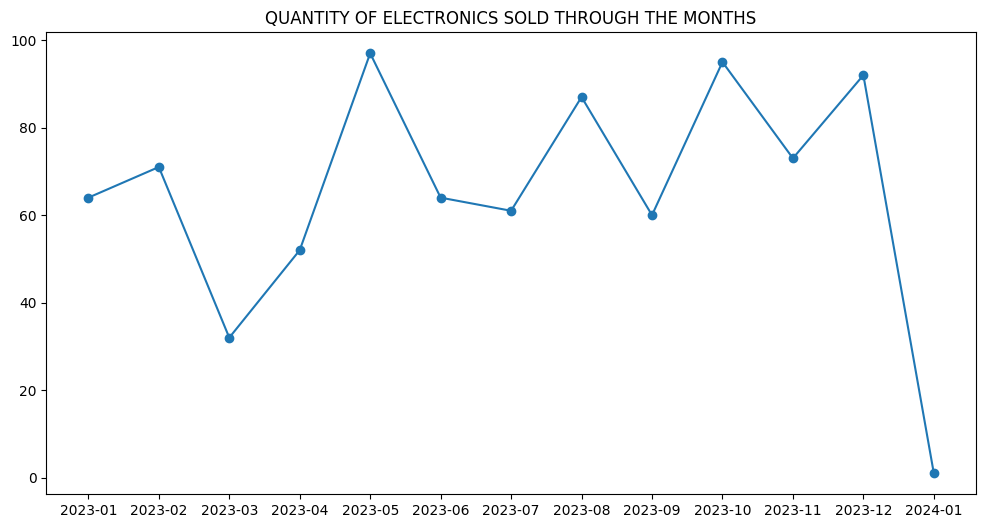

In [ ]:
trend(e_dd_mm['dd-mm'], e_dd_mm['quantity'], 'QUANTITY OF ELECTRONICS SOLD THROUGH THE MONTHS')

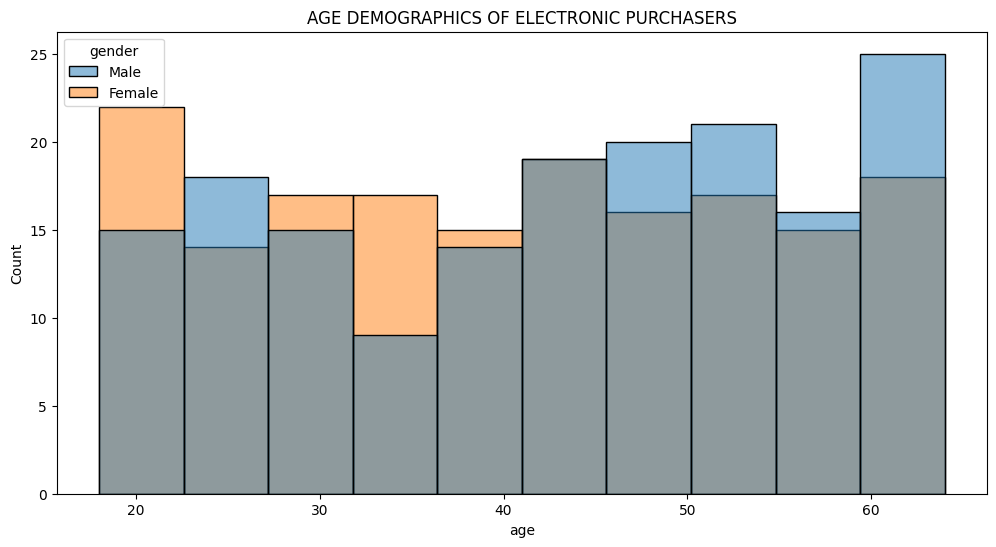

In [ ]:
age_demo(e_df, 'AGE DEMOGRAPHICS OF ELECTRONIC PURCHASERS')

* Though men buy comparetively less quantity they tend to spend more money than women. Suggests that men opt for higher end brands.

* Sales peek during May followed by October and fall the most during March

* Most of the male customers are relatively older and female customers tend to be on the younger spectrum. This may explain why men spend more money on less quantity since at their point in age they might have an established career while the women are just starting out/stabilisng their careers.

**BEAUTY**

In [ ]:
b_df = col_df('Beauty')
b_sales, b_quant = sales_quant('Beauty')
b_dd_mm = b_df.groupby('dd-mm')['quantity'].sum().reset_index()

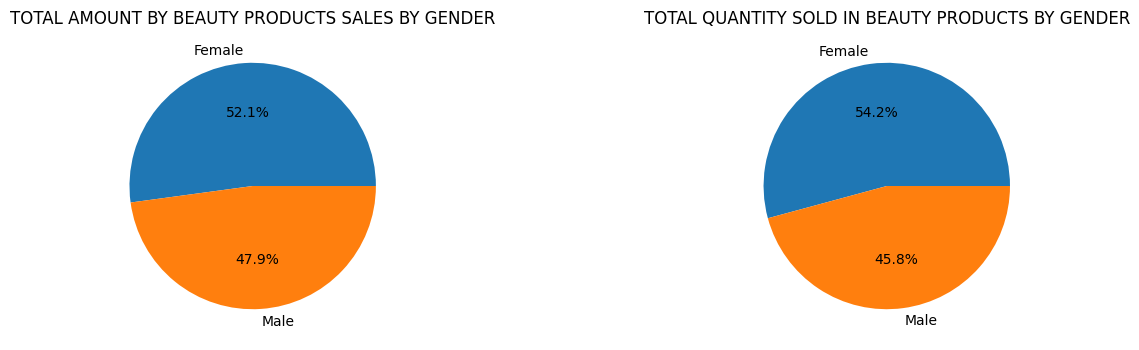

In [ ]:
pie_plts(b_sales['total_amount'], b_sales['gender'], 'TOTAL AMOUNT BY BEAUTY PRODUCTS SALES BY GENDER',
        b_quant['quantity'], b_quant['gender'], 'TOTAL QUANTITY SOLD IN BEAUTY PRODUCTS BY GENDER')

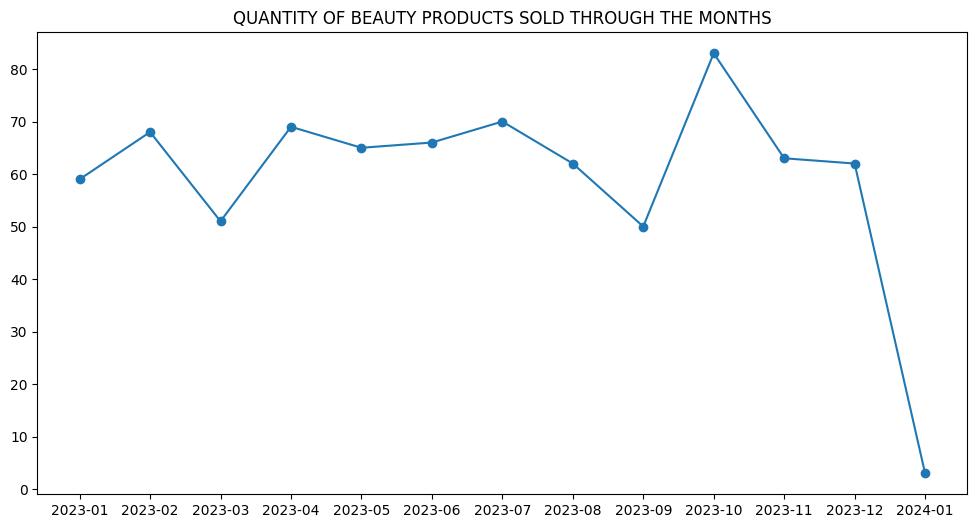

In [ ]:
trend(b_dd_mm['dd-mm'], b_dd_mm['quantity'], 'QUANTITY OF BEAUTY PRODUCTS SOLD THROUGH THE MONTHS')

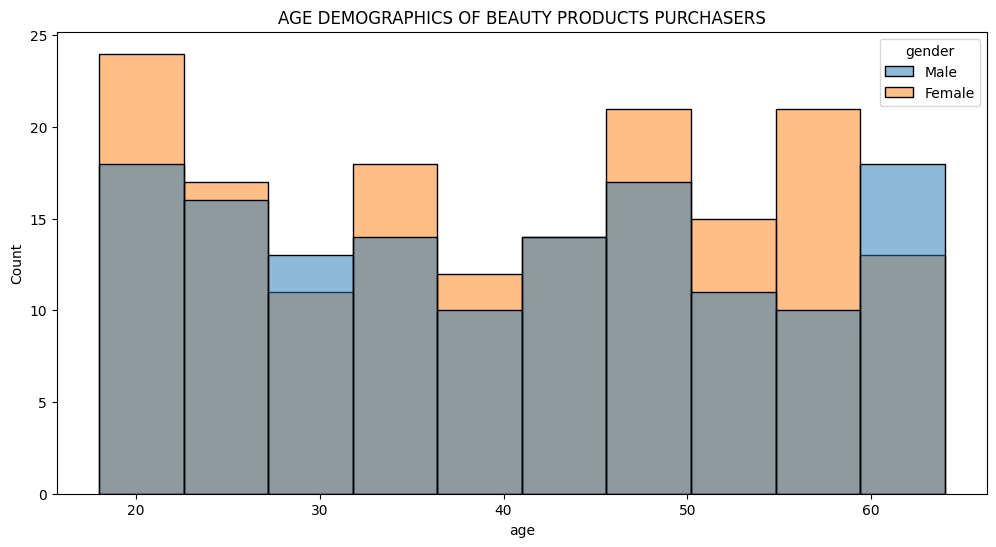

In [ ]:
age_demo(b_df, 'AGE DEMOGRAPHICS OF BEAUTY PRODUCTS PURCHASERS')

* Sales peeks during October and falls during March and September

* Customers are predominantly women in their 20s and a fair amount of men in their 60s

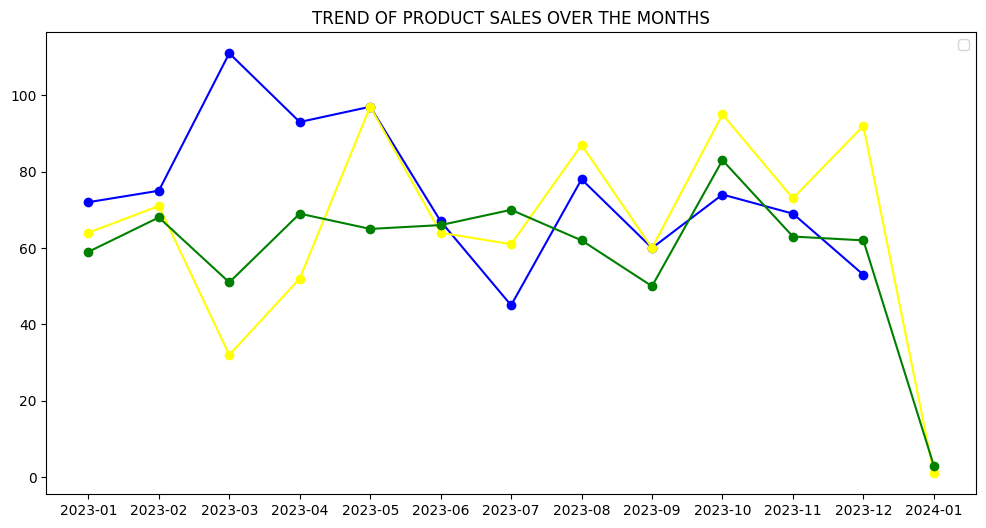

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(c_dd_mm['dd-mm'], c_dd_mm['quantity'],color='blue', marker='o')
plt.plot(e_dd_mm['dd-mm'], e_dd_mm['quantity'], color= 'yellow', marker='o')
plt.plot(b_dd_mm['dd-mm'], b_dd_mm['quantity'], color='green', marker='o')
plt.title('TREND OF PRODUCT SALES OVER THE MONTHS')
plt.legend()
plt.show()

Clothings are bought during the start of the year while Electronic products peek in the middle and Beauty products peek at the end of the year.